# Робота з бібліотекою OpenCV

In [1]:
N = ord("Y") % 5 + 1
N

5

Завантажити дані з файлу lab5.xlsx до датафрейму

In [337]:
import pandas as pd
import glob
import os
from matplotlib import colors
import cv2

df =pd.read_excel('lab5.xlsx')
df

,N,file name,image size,glasses color,line width
0,1,emma-watson2.jpg,300x300,red,2
1,2,emma-watson.jpg,400x400,blue,3
2,3,draco.jpg,700x700,cian,4
3,4,longbottom.jpg,600x600,magenta,5
4,5,ron_wesley.jpg,500x500,yellow,6


In [338]:
df.loc[df['glasses color'] == 'cian', 'glasses color'] = 'cyan'
df

,N,file name,image size,glasses color,line width
0,1,emma-watson2.jpg,300x300,red,2
1,2,emma-watson.jpg,400x400,blue,3
2,3,draco.jpg,700x700,cyan,4
3,4,longbottom.jpg,600x600,magenta,5
4,5,ron_wesley.jpg,500x500,yellow,6


Отримати дані до свого варіанту програмно з датафрейму

In [339]:
my_data = df.loc[4]
my_data

,4
N,5
file name,ron_wesley.jpg
image size,500x500
glasses color,yellow
line width,6


Створити функцію, що приймає в якості аргументів дані з датафрейму та
повертає зменшене зображення з доданими «круглими окулярами» та
зберігає отримане зображення у файл.

In [361]:
def add_round_glasses(data):
  color = data['glasses color']
  rgb_color = colors.to_rgb(color)
  bgr_color = (int(rgb_color[2] * 255), int(rgb_color[1] * 255), int(rgb_color[0] * 255))

  line_width = data['line width']

  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

  img = cv2.imread(glob.glob(os.path.join('Images', data['file name']))[0])
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=4)

  (x, y, w, h) = faces[0]
  image_size = data['image size'].split('x')
  target_size = (int(image_size[0]), int(image_size[1]))

  additional_w = (target_size[0] - w) // 2
  additional_h = (target_size[1] - h) // 2

  start_x = x - additional_w
  start_y = y - additional_h
  end_x = min(img.shape[1], x + w + additional_w)
  end_y = min(img.shape[0], y + h + additional_h)

  if start_y < 0:
        end_y = end_y - start_y
        start_y = 0

  if start_x < 0:
        end_x = end_x - start_x
        start_x = 0

  cropped_img = img[start_y:end_y, start_x:end_x]
  cropped_height, cropped_width = cropped_img.shape[:2]
  if cropped_width != target_size[0] or cropped_height != target_size[1]:
      cropped_img = cv2.resize(cropped_img, target_size)

  roi_gray = gray[start_y:end_y, start_x:end_x]

  eyes = eye_cascade.detectMultiScale(roi_gray)
  for (xe,ye,we,he) in eyes[:2]:
    cv2.circle(cropped_img, (xe + (we//2), ye + (he//2)), 27, bgr_color, line_width)

  (xe,ye,we,he) = eyes[0] if (eyes[0][0] > eyes[1][0]) else eyes[1]
  (xe1,ye1,we1,he1) = eyes[1] if (eyes[0][0] > eyes[1][0]) else eyes[0]

  cv2.line(cropped_img, (xe - 4, ye+(he//2)), (xe1 + we1, ye1 + (he1//2)), bgr_color, line_width)
  cv2.line(cropped_img, (xe + we + 5, ye+(he//2)), (xe + we + (we//2), ye + (he//2)-3), bgr_color, line_width)

  cv2.line(cropped_img, (xe1-3, ye1+(he//2)+3), (xe1 - (we1//2), ye1 + (he1//2) - 5), bgr_color, line_width)

  cv2.imwrite(data['file name'], cropped_img)
  return cv2.cvtColor(cropped_img, cv2.COLOR_RGB2BGR)

array([[[55, 59, 58],
        [54, 58, 57],
        [53, 57, 56],
        ...,
        [48, 57, 54],
        [49, 58, 55],
        [50, 59, 56]],

       [[55, 59, 58],
        [54, 58, 57],
        [53, 57, 56],
        ...,
        [49, 58, 55],
        [50, 59, 56],
        [51, 60, 57]],

       [[54, 58, 57],
        [54, 58, 57],
        [54, 58, 57],
        ...,
        [49, 58, 55],
        [50, 59, 56],
        [51, 60, 57]],

       ...,

       [[52, 57, 53],
        [51, 56, 52],
        [48, 53, 49],
        ...,
        [61, 70, 69],
        [62, 71, 70],
        [63, 72, 71]],

       [[55, 60, 56],
        [49, 54, 50],
        [34, 39, 35],
        ...,
        [61, 70, 69],
        [62, 71, 70],
        [62, 71, 70]],

       [[59, 64, 60],
        [53, 58, 54],
        [39, 44, 40],
        ...,
        [63, 72, 71],
        [63, 72, 71],
        [62, 71, 70]]], dtype=uint8)
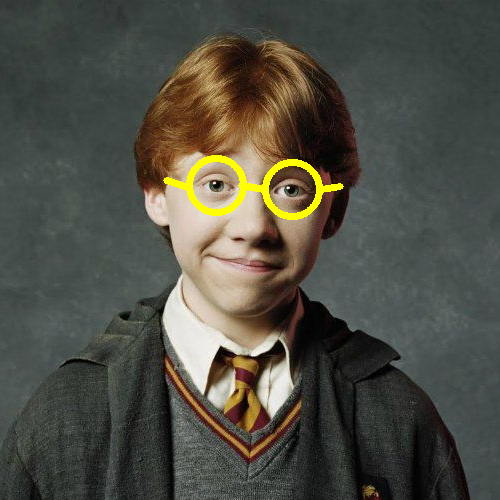

In [364]:
img = add_round_glasses(my_data)
img

array([[[14, 14, 14],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [34, 22, 22],
        [36, 26, 25],
        [34, 26, 24]],

       [[14, 14, 14],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [38, 22, 22],
        [39, 25, 24],
        [36, 25, 23]],

       [[14, 14, 14],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [38, 22, 22],
        [39, 25, 22],
        [36, 25, 23]],

       ...,

       [[14, 14, 14],
        [ 2,  2,  2],
        [ 1,  1,  1],
        ...,
        [26, 15, 21],
        [33, 21, 25],
        [35, 23, 27]],

       [[14, 14, 14],
        [ 2,  2,  2],
        [ 1,  1,  1],
        ...,
        [25, 15, 24],
        [32, 20, 30],
        [24, 13, 21]],

       [[14, 14, 14],
        [ 2,  2,  2],
        [ 1,  1,  1],
        ...,
        [37, 29, 42],
        [30, 19, 33],
        [24, 13, 27]]], dtype=uint8)
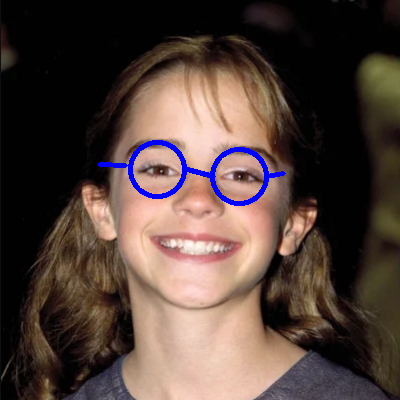

In [362]:
test_data_1 = df.loc[1]
test_img_1 = add_round_glasses(test_data_1)
test_img_1

array([[[ 12,  11,  19],
        [ 12,  11,  19],
        [ 12,  11,  19],
        ...,
        [ 74, 105, 126],
        [ 76, 104, 126],
        [ 74, 105, 126]],

       [[ 12,  11,  19],
        [ 12,  11,  19],
        [ 12,  11,  19],
        ...,
        [ 74, 105, 126],
        [ 76, 104, 126],
        [ 76, 104, 126]],

       [[ 12,  11,  19],
        [ 12,  11,  19],
        [ 12,  11,  19],
        ...,
        [ 74, 105, 126],
        [ 76, 104, 126],
        [ 76, 104, 126]],

       ...,

       [[  8,   7,  15],
        [  8,   7,  15],
        [  8,   7,  15],
        ...,
        [160, 173, 192],
        [158, 171, 188],
        [158, 171, 188]],

       [[  8,   7,  15],
        [  8,   7,  15],
        [  8,   7,  15],
        ...,
        [161, 174, 193],
        [159, 172, 189],
        [158, 171, 188]],

       [[  7,   7,  15],
        [  7,   7,  15],
        [  7,   7,  15],
        ...,
        [161, 176, 195],
        [157, 173, 189],
        [156, 172, 188]]], dtype=uint8)
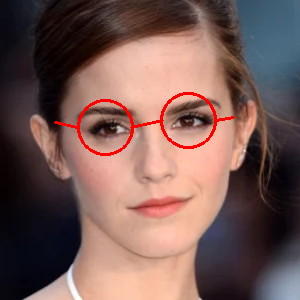

In [363]:
test_data_2 = df.loc[0]
test_img_2 = add_round_glasses(test_data_2)
test_img_2